In [1]:
import matplotlib.pyplot as plt
import random

In [14]:
class UndirectedGraph:
    def __init__(self, num_vertices=None):
        self.graph = {}
        self.num_vertices = num_vertices
        self.edgeCount = 0
        self.nodeCount = 0
        if num_vertices:
            for i in range(1,self.num_vertices+1):
                self.graph[i] = list()

    def addNode(self, node):
        if self.num_vertices is not None and (node < 1 or node > self.num_vertices):
            raise Exception("Node index cannot exceed the number of nodes")
        self.graph[node] = list()
        self.nodeCount += 1

    def addEdge(self, node1, node2):
        if node1 not in self.graph:
            self.addNode(node1)
        if node2 not in self.graph:
            self.addNode(node2)

        self.graph[node1].append(node2)
        self.graph[node2].append(node1)
        self.edgeCount += 1

    def __add__(self, other):
        new_graph = UndirectedGraph(self.num_vertices)
        
        # Copy existing graph
        new_graph.graph = {node: neighbors.copy() for node, neighbors in self.graph.items()}
        new_graph.edgeCount = self.edgeCount
        new_graph.nodeCount = self.nodeCount

        # Modify the new graph based on the type of 'other'
        if type(other) == int:
            new_graph.addNode(other)
        elif type(other) == tuple:
            new_graph.addEdge(other[0], other[1])

        return new_graph

    def __str__(self) -> str:
        result = f"Graph with {self.nodeCount if not self.num_vertices else self.num_vertices} nodes and {self.edgeCount} edges. Neighbours of the nodes are belows:\n"

        for node, neighbors in self.graph.items():
            result += f"Node {node}: {{{', '.join(map(str, neighbors))}}}\n"

        return result

    def plotDegDist(self):
        degrees = [len(neighbors) for neighbors in self.graph.values()]
        total_nodes = len(degrees)

        # Count occurrences of each degree
        degree_counts = {degree: degrees.count(degree) for degree in set(degrees)}

        # Add 0 for degrees that don't exist
        for i in range(0, self.num_vertices):
            if i not in degree_counts:
                degree_counts[i] = 0


        # Calculate fraction of nodes for each degree
        x_values = list(degree_counts.keys())

        # print(degree_counts)
        y_values = [count / total_nodes for count in degree_counts.values()]

        # Add 0 for degrees that don't exist
        # y_values += [0.0] * (self.num_vertices - len(x_values))
        # while self.num_vertices != len(x_values):
        #     x_values.append(len(x_values))
            
            
        # Calculate average node degree
        average_degree = sum(degrees) / total_nodes

        # Plot degree distribution with points
        plt.scatter(x_values, y_values, s=15, color='blue', label='Actual degree distribution')
        plt.axvline(x=average_degree, color='red', linewidth=2, label='Avg. node degree')

        plt.title("Node Degree Distribution")
        plt.xlabel("Node Degree")
        plt.ylabel("Fraction of Nodes")
        plt.legend()
        plt.grid()
        plt.show()
    
    def isConnected(self):
        if not self.graph:
            return False

        start_node = next(iter(self.graph))
        visited = set()
        queue = [start_node]
        visited.add(start_node)

        # Perform BFS
        while queue:
            current_node = queue.pop(0)
            for neighbor in self.graph[current_node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        # If all nodes are visited, the graph is connected
        return len(visited) == len(self.graph)

In [17]:
class ERRandomGraph(UndirectedGraph):
    def __init__(self, n):
        super().__init__(n)

    def sample(self, p):
        for i in range(1, self.num_vertices + 1):
            for j in range(i + 1, self.num_vertices + 1):
                if random.random() < p:
                    self.addEdge(i, j)


In [15]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (2, 3)
g = g + (3, 4)
g = g + (3, 5)
print(g.isConnected())


True


In [16]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (2, 3)
g = g + (3, 5)
print(g.isConnected())
print(g)

False
Graph with 5 nodes and 3 edges. Neighbours of the nodes are belows:
Node 1: {2}
Node 2: {1, 3}
Node 3: {2, 5}
Node 4: {}
Node 5: {3}



0
0.0001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008000000000000001
0.0009000000000000002
0.0010000000000000002
0.0011000000000000003
0.0012000000000000003
0.0013000000000000004
0.0014000000000000004
0.0015000000000000005
0.0016000000000000005
0.0017000000000000006
0.0018000000000000006
0.0019000000000000006
0.0020000000000000005
0.0021000000000000003
0.0022
0.0023
0.0024
0.0024999999999999996
0.0025999999999999994
0.0026999999999999993
0.002799999999999999
0.002899999999999999
0.0029999999999999988
0.0030999999999999986
0.0031999999999999984
0.0032999999999999982
0.003399999999999998
0.003499999999999998
0.0035999999999999977
0.0036999999999999976
0.0037999999999999974
0.0038999999999999972
0.0039999999999999975
0.004099999999999998
0.004199999999999998
0.004299999999999998
0.0043999999999999985
0.004499999999999999
0.004599999999999999
0.004699999999999999
0.0048
0.0049
0.005
0.0051
0.005200000000000001
0.005300000000000001
0.0054000

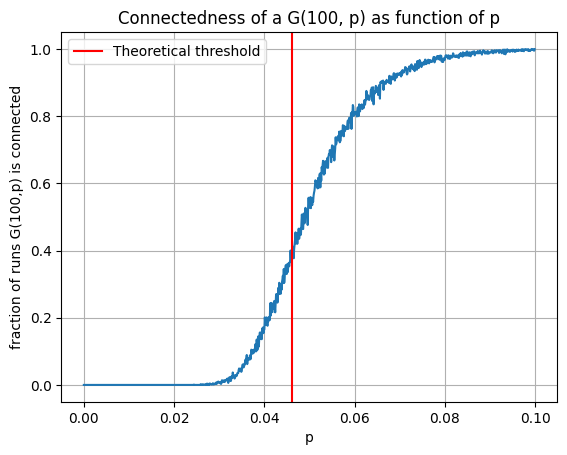

In [22]:
import math
def check():
    theorp = math.log(100)/100
    p=[]
    y=[]
    i=0
    while i<=0.1:
        count=0
        p.append(i)
        print(i)
        for k in range(1000):
            g = ERRandomGraph(100)
            g.sample(i)
            if g.isConnected():
                count+=1
        i+=0.0001
        y.append(count/1000)   #Averaged over 1000 runs
        
    plt.plot(p,y)
    plt.axvline(x = theorp,color = 'r',label = 'Theoretical threshold')
    plt.title('Connectedness of a G(100, p) as function of p')
    plt.xlabel('p')
    plt.ylabel('fraction of runs G(100,p) is connected')
    plt.grid()
    plt.legend()
    plt.show()

check()